# Nibabel Basics Notebook
### *Learning how to load and view MRI scans*

## Import Libraries
We need nibabel for MRI files and matplotlib for plotting.

In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

## Upload an MRI File (.nii.gz)
Upload any NIfTI file.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CT_AVM.nii to CT_AVM.nii


## Load MRI File
Nibabel loads the 3D MRI volume as a NumPy array.

In [ ]:
file_path = list(uploaded.keys())[0]
mri = nib.load(file_path).get_fdata()
print('MRI Shape:', mri.shape)

MRI Shape: (256, 242, 154)


## Visualize a Middle Slice
MRI is 3D. We view one slice at a time.

(np.float64(-0.5), np.float64(241.5), np.float64(255.5), np.float64(-0.5))

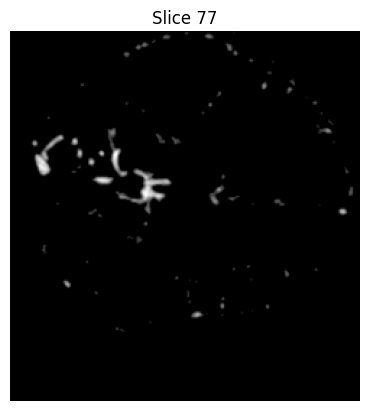

In [ ]:
slice_index = mri.shape[2] // 2
plt.imshow(mri[:, :, slice_index], cmap='gray')
plt.title(f'Slice {slice_index}')
plt.axis('off')

## Extract All Slices
Convert 3D MRI into 2D slices.

In [ ]:
slices = [mri[:, :, i] for i in range(mri.shape[2])]
len(slices)

154

## Normalize a Slice
Normalization improves contrast.

(np.float64(-0.5), np.float64(241.5), np.float64(255.5), np.float64(-0.5))

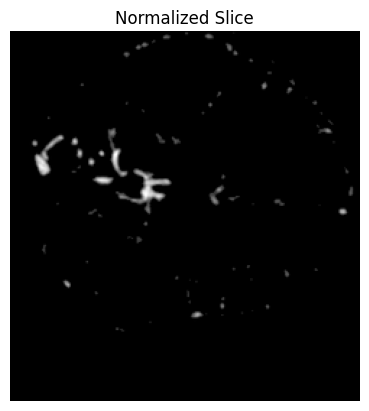

In [ ]:
norm_slice = (mri[:, :, slice_index] - np.min(mri)) / (np.max(mri) - np.min(mri))
plt.imshow(norm_slice, cmap='gray')
plt.title('Normalized Slice')
plt.axis('off')

## Resize Slice (Used in ML Preprocessing)

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

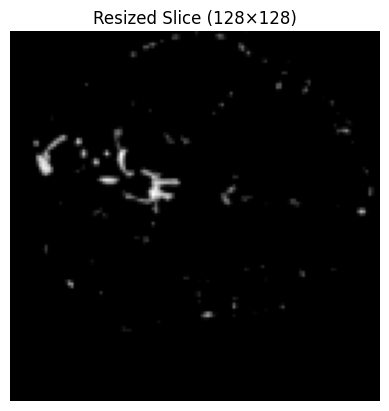

In [ ]:
import tensorflow as tf
resized = tf.image.resize(norm_slice[..., None], (128, 128))
plt.imshow(resized.numpy().squeeze(), cmap='gray')
plt.title('Resized Slice (128×128)')
plt.axis('off')

## **Exercises**
1. Load **another** MRI file and visualize 5 slices.
2. Write a function `plot_slices(volume, indices)` to plot given slice numbers.
3. Create a function to normalize **all** slices and return the new array.
4. Resize all slices to 128×128 and count how many slices contain tumor pixels (if mask available).


TASK-1


Saving CT_AVM.nii to CT_AVM (1).nii


(np.float64(-0.5), np.float64(241.5), np.float64(255.5), np.float64(-0.5))

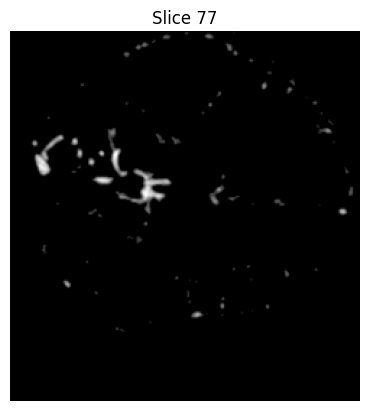

In [12]:
from google.colab import files
uploaded = files.upload()
file_path = list(uploaded.keys())[0]
mri = nib.load(file_path).get_fdata()




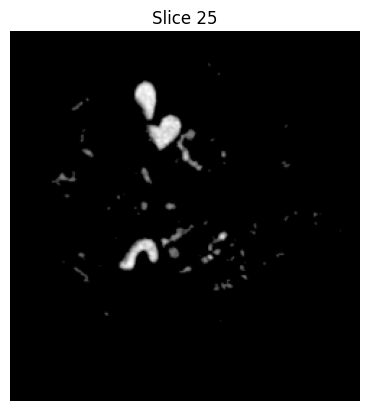

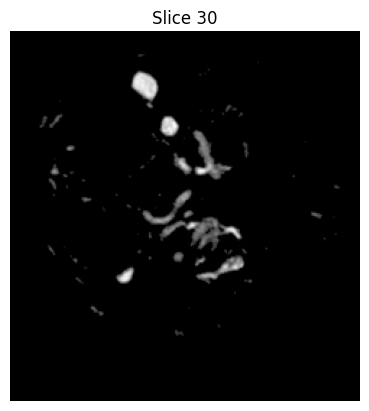

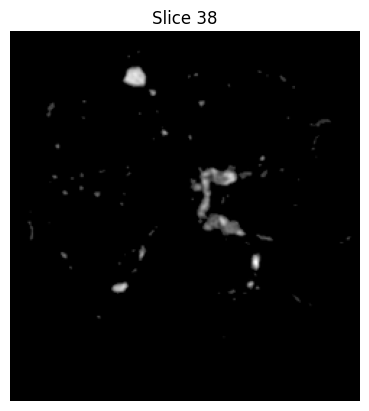

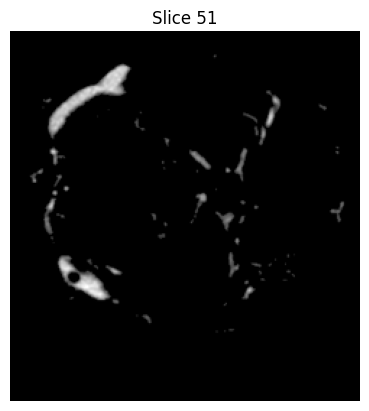

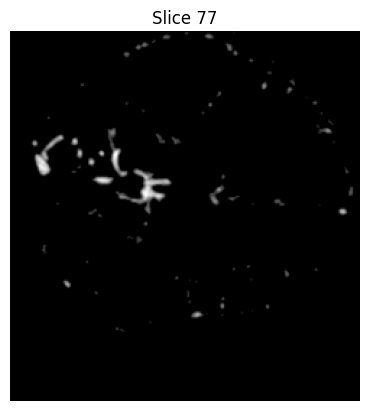

In [15]:
# visualising slices

slice_indices = [
    mri.shape[2] // 6,
    mri.shape[2] // 5,
    mri.shape[2] // 4,
    mri.shape[2] // 3,
    mri.shape[2] // 2
]

for idx in slice_indices:
    plt.figure()
    plt.imshow(mri[:, :, idx], cmap='gray')
    plt.title(f"Slice {idx}")
    plt.axis('off')
    plt.show()


TASK-2

In [ ]:
def plot_slices(volume, indices):
  for idx in indices:
    plt.figure()
    plt.imshow(volume[:, :, idx], cmap='gray')
    plt.title(f"Slice {idx}")
    plt.axis('off')
    plt.show()

TASK-3

In [ ]:
def normalise_slices(mri):
  slices = [mri[:, :, i] for i in range(mri.shape[2])]
  norm_slices = []
  for slice in slices:
    norm_slice = (slice - np.min(slice)) / (np.max(slice) - np.min(slice))
    norm_slices.append(norm_slice)
  return norm_slices


TASK_4

In [ ]:
# Resize all slices to 128×128 and count how many slices contain tumor pixels (if mask available).
import tensorflow as tf

def resize(slices):
  resized = []
  for slice in slices:
    resized.append(tf.image.resize(slice[..., None], (128, 128)))
  return resized
